# **Penjelasan Konseptual**

Kode yang Anda berikan mendemonstrasikan operasi-operasi dasar dalam pengolahan sinyal digital, baik untuk sinyal satu dimensi (1D) seperti audio, maupun sinyal dua dimensi (2D) seperti gambar.

## Sinyal 1D (Audio) 🎧

### Representasi Sinyal
Sinyal audio direpresentasikan sebagai larik (array) numerik satu dimensi. Setiap angka dalam larik ini mewakili amplitudo sinyal pada titik waktu tertentu. Kode Anda memuat file audio (`cat.wav`) menggunakan pustaka `librosa`. Hasilnya adalah larik `y` (data sinyal) dan `sr` (laju pencuplikan atau *sampling rate*).

### Visualisasi Sinyal
Sinyal audio divisualisasikan sebagai gelombang (*waveform*) menggunakan `librosa.display.waveshow`. Sumbu horizontal merepresentasikan waktu (dalam detik), dan sumbu vertikal merepresentasikan amplitudo.

### Operasi Dasar
- **Penskalaan (Scaling)**:  
  Amplitudo sinyal dikalikan dengan suatu faktor skalar.  
  Contoh: `y_scaled = 0.5 * y` berarti setiap sampel amplitudo dikalikan 0.5, yang secara efektif mengurangi kenyaringan sinyal.

- **Penggeseran Waktu (Time Shifting)**:  
  Sampel-sampel sinyal digeser sepanjang sumbu waktu.  
  Contoh: `np.roll(y, 10000)` menggeser sinyal sebanyak 10000 sampel ke kanan (secara siklik), mensimulasikan penundaan (*delay*).

- **Penjumlahan (Addition)**:  
  Dua sinyal dijumlahkan dengan menambahkan nilai amplitudo masing-masing sampel pada titik waktu yang bersesuaian.  
  Contoh: `y_sum = y + y_shifted`.

- **Eksperimen Kombinasi Operasi**:  
  Operasi-operasi ini dapat dikombinasikan, misalnya:  
  ```python
  y_combined = 2 * y + np.roll(y, 10000)

## Sinyal 2D (Gambar) 🖼️

### Representasi Sinyal
Gambar direpresentasikan sebagai larik numerik dua dimensi. Setiap elemen dalam larik mewakili intensitas piksel pada koordinat spasial tertentu (baris dan kolom).  
Kode Anda memuat gambar (`cat.jpg`) dalam format grayscale menggunakan `cv2.imread`.

### Visualisasi Sinyal
Gambar ditampilkan menggunakan `plt.imshow` dengan peta warna (*colormap*) `'gray'`.

### Operasi Dasar

- **Penjumlahan Intensitas**  
  Nilai skalar ditambahkan ke setiap piksel gambar, yang mengubah kecerahan gambar.  
  Contoh:  
  ```python
  added_img = cv2.add(img, 150)
# Sinyal 2D (Gambar) 🖼️

## Representasi Sinyal
Gambar direpresentasikan sebagai larik numerik dua dimensi. Setiap elemen dalam larik mewakili intensitas piksel pada koordinat spasial tertentu (baris dan kolom). Kode Anda memuat gambar (`cat.jpg`) dalam format grayscale menggunakan `cv2.imread`.

## Visualisasi Sinyal
Gambar ditampilkan menggunakan `plt.imshow` dengan peta warna (colormap) `'gray'`.

## Operasi Dasar

- **Penjumlahan Intensitas**  
  Nilai skalar ditambahkan ke setiap piksel gambar, yang mengubah kecerahan gambar. Dalam `added_img = cv2.add(img, 150)`, intensitas setiap piksel ditingkatkan sebesar 150 (nilai akan dijepit ke 255 jika melebihi).

- **Penskalaan Kecerahan (Brightness Scaling)**  
  Intensitas piksel dikalikan dengan faktor skalar (`alpha`) dan ditambahkan dengan bias (`beta`). Fungsi `cv2.convertScaleAbs(img, alpha=2, beta=0)` meningkatkan kontras dengan mengalikan intensitas piksel dengan 2.

- **Penggeseran Spasial (Spatial Shifting)**  
  Gambar digeser secara spasial menggunakan transformasi affine. Matriks transformasi `M = np.float32([[1, 0, 50], [0, 1, 30]])` mendefinisikan pergeseran 50 piksel ke kanan dan 30 piksel ke bawah. Fungsi `cv2.warpAffine` menerapkan transformasi ini.

- **Eksperimen Kombinasi Operasi**  
  Serupa dengan audio, operasi pada gambar juga bisa dikombinasikan, misalnya dengan menambahkan intensitas (`cv2.add(img, 30)`) lalu melakukan penskalaan kecerahan (`cv2.convertScaleAbs(..., alpha=1.2)`).


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import cv2
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Representasi Sinyal 1D: Sinus dan Kosinus**

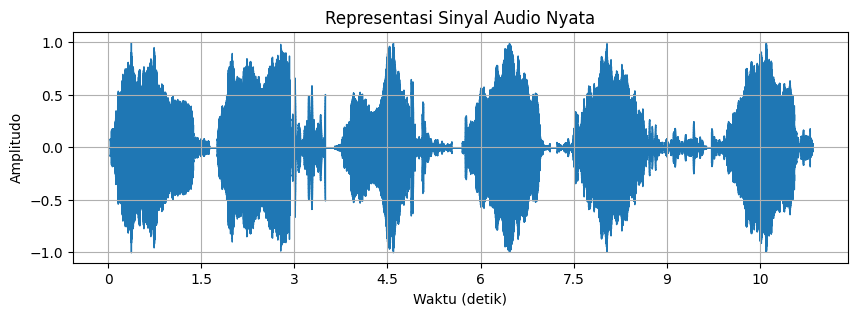

In [18]:
# Load audio file (misalnya dari Google Drive)
audio_path = '/content/drive/My Drive/Banner/cat.wav'  # ganti dengan path kamu
y, sr = librosa.load(audio_path)

# Visualisasi sinyal audio
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title('Representasi Sinyal Audio Nyata')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


# **Operasi Dasar pada Sinyal 1D**

**b. Penskalaan**

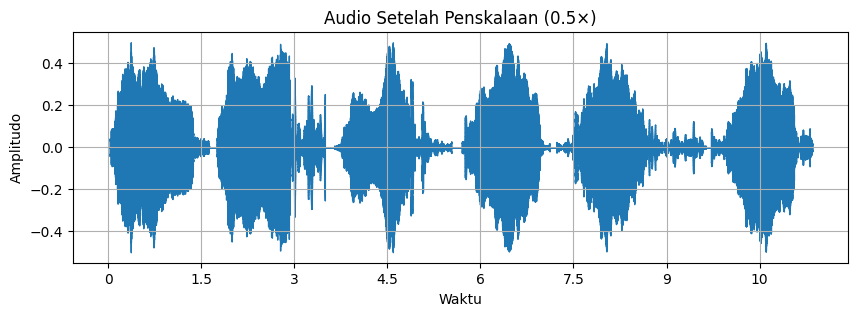

In [23]:
y_scaled = 0.5 * y

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_scaled, sr=sr)
plt.title('Audio Setelah Penskalaan (0.5×)')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


**c. Penggeseran (Time Shifting)**

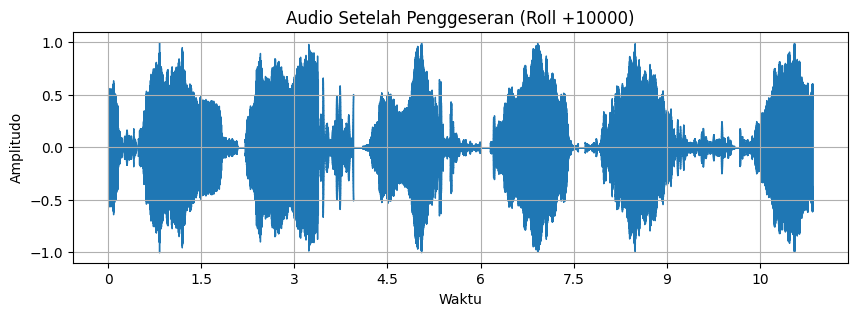

In [20]:
y_shifted = np.roll(y, 10000)  # geser sekitar 10000 sampel

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_shifted, sr=sr)
plt.title('Audio Setelah Penggeseran (Roll +10000)')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


**a. Penjumlahan**

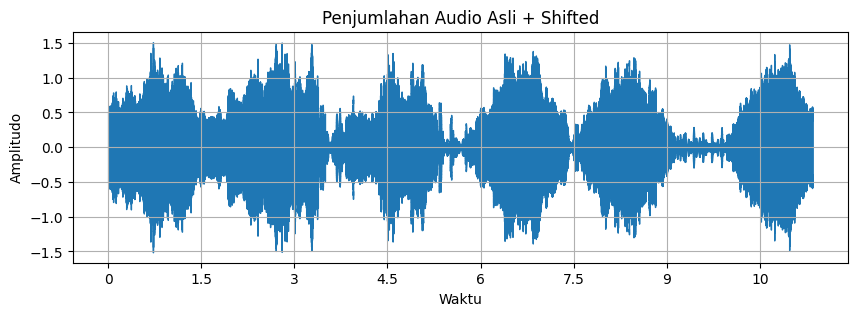

In [21]:
y_sum = y + y_shifted

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_sum, sr=sr)
plt.title('Penjumlahan Audio Asli + Shifted')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


# 5. Eksperimen Kombinasi Operasi pada Sinyal 1D

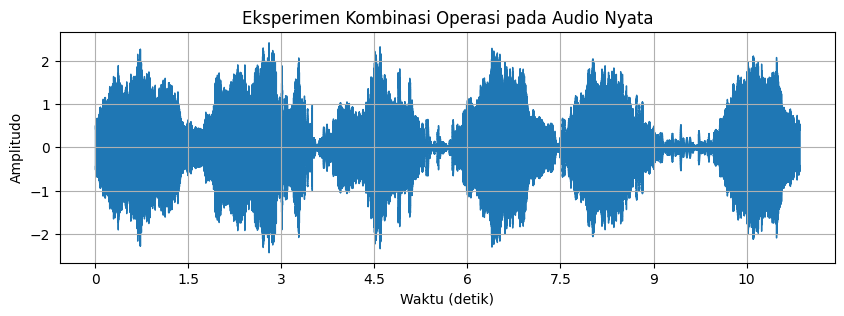

In [25]:
# Gabungan: skala, geser, lalu jumlahkan pada audio nyata
y_audio_exp = (2 * y) + np.roll(y, 10000)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_audio_exp, sr=sr)
plt.title('Eksperimen Kombinasi Operasi pada Audio Nyata')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()



# 6. Representasi Sinyal 2D (Gambar)

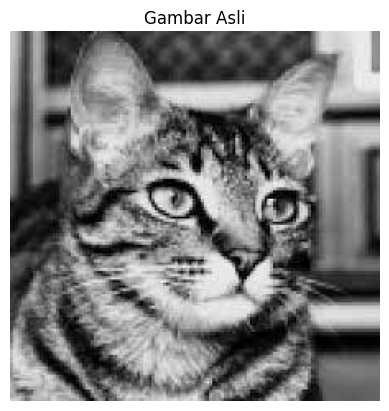

In [33]:
import cv2
import matplotlib.pyplot as plt

# Path gambar
img_path = '/content/drive/My Drive/Banner/cat.jpg'

# Baca gambar menggunakan OpenCV
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Membaca sebagai grayscale

# Cek apakah gambar berhasil dimuat
if img is None:
    print(f"Error: Tidak dapat memuat gambar dari path: {img_path}")
else:
    # Tampilkan gambar menggunakan matplotlib
    plt.imshow(img, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')
    plt.show()

# 7. Operasi Dasar pada Sinyal 2D

**a. Penjumlahan Gambar**

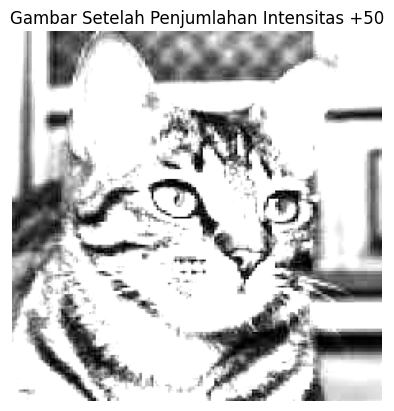

In [39]:
added_img = cv2.add(img, 150)  # Tambahkan intensitas

plt.imshow(added_img, cmap='gray')
plt.title('Gambar Setelah Penjumlahan Intensitas +50')
plt.axis('off')
plt.show()


**b. Penskalaan Gambar**

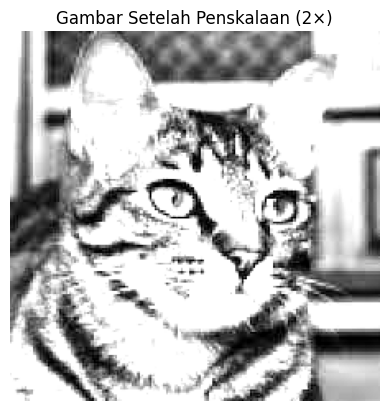

In [42]:
scaled_img = cv2.convertScaleAbs(img, alpha=2, beta=0)  # Skala brightness 1.5×

plt.imshow(scaled_img, cmap='gray')
plt.title('Gambar Setelah Penskalaan (2×)')
plt.axis('off')
plt.show()


**c. Penggeseran Gambar (Spasial)**

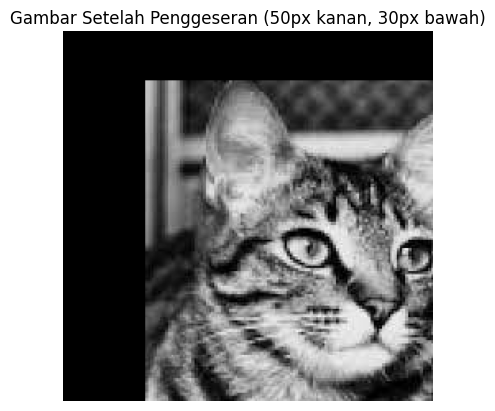

In [43]:
rows, cols = img.shape
M = np.float32([[1, 0, 50], [0, 1, 30]])  # Geser kanan 50px, bawah 30px
shifted_img = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(shifted_img, cmap='gray')
plt.title('Gambar Setelah Penggeseran (50px kanan, 30px bawah)')
plt.axis('off')
plt.show()


#  8. Eksperimen Kombinasi Operasi pada Gambar

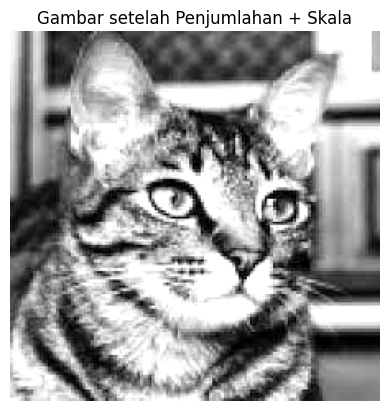

In [46]:
combined_img = cv2.convertScaleAbs(cv2.add(img, 30), alpha=1.2)
plt.imshow(combined_img, cmap='gray')
plt.title('Gambar setelah Penjumlahan + Skala')
plt.axis('off')
plt.show()


# Refleksi dan Analisis Hasil

Dari eksperimen yang dilakukan dalam kode, kita dapat menarik beberapa kesimpulan penting:

### Sinyal 1D (Audio)

- **Penskalaan Amplitudo**  
  Mengalikan sinyal audio dengan skalar kurang dari 1 (misalnya `0.5`) secara efektif menurunkan amplitudo rata-rata sinyal. Secara perseptual, ini akan membuat suara terdengar lebih pelan. Sebaliknya, mengalikan dengan skalar lebih dari 1 akan meningkatkan amplitudo dan membuat suara terdengar lebih keras.

- **Penggeseran Waktu**  
  Operasi `np.roll` pada sinyal audio mensimulasikan penundaan atau pergeseran fasa sinyal. Besarnya pergeseran (`10000` sampel) akan menentukan seberapa jauh sinyal "terlambat" atau "lebih awal" dibandingkan sinyal aslinya. Ini adalah konsep dasar dalam analisis *delay* atau efek *gema (echo)*.

- **Penjumlahan Sinyal**  
  Menjumlahkan dua sinyal audio (misalnya, sinyal asli dengan versi tergesernya) akan menghasilkan sinyal gabungan. Jika kedua sinyal memiliki komponen frekuensi yang sama, penjumlahan ini dapat menyebabkan *interferensi konstruktif* (penguatan) atau *interferensi destruktif* (pelemahan) pada frekuensi tertentu, tergantung pada fasa relatifnya. Dalam kasus penjumlahan sinyal asli dengan versi tergesernya, ini dapat menciptakan efek seperti *chorus* atau *flanging* ringan, atau bahkan *gema* jika pergeserannya cukup besar.

- **Eksperimen Kombinasi**  
  Menggabungkan operasi (misalnya, penskalaan lalu penjumlahan dengan versi tergeser) menunjukkan bagaimana efek audio yang lebih kompleks dapat dibangun dari operasi-operasi dasar. Misalnya, `(2 * y) + np.roll(y, 10000)` akan menghasilkan sinyal yang lebih keras (karena dikali 2) dan memiliki gema (karena dijumlahkan dengan versi tergeser dari sinyal asli).


### Sinyal 2D (Gambar)

- **Penjumlahan Intensitas**  
  Menambahkan nilai konstan ke setiap piksel gambar akan meningkatkan kecerahan keseluruhan gambar. Jika nilai penambah terlalu besar, piksel-piksel terang bisa mencapai saturasi (nilai maksimum, biasanya `255` untuk gambar 8-bit *grayscale*), menyebabkan hilangnya detail di area terang.

- **Penskalaan Kecerahan**  
  Menggunakan `cv2.convertScaleAbs` dengan `alpha > 1` akan meningkatkan kontras gambar, membuat area terang menjadi lebih terang dan area gelap menjadi lebih gelap. Parameter `beta` dapat digunakan untuk menyesuaikan kecerahan keseluruhan setelah penskalaan kontras.

- **Penggeseran Spasial**  
  Transformasi *affine* dengan matriks pergeseran akan mentranslasikan posisi gambar secara keseluruhan. Area yang "kosong" akibat pergeseran biasanya diisi dengan warna hitam (nilai piksel `0`).

- **Eksperimen Kombinasi**  
  Mengkombinasikan operasi seperti penambahan intensitas diikuti penskalaan (`cv2.convertScaleAbs(cv2.add(img, 30), alpha=1.2)`) memungkinkan manipulasi visual yang lebih halus. Dalam contoh ini, gambar pertama-tama dibuat sedikit lebih terang, lalu kontrasnya ditingkatkan.


  ### Kesimpulan Umum

Eksperimen ini dengan jelas mengilustrasikan bagaimana operasi matematika dasar dapat memanipulasi karakteristik fundamental dari sinyal digital. Pemahaman konseptual terhadap operasi-operasi ini adalah fondasi penting dalam pengolahan sinyal, baik untuk:

- **Audio**: efek suara, pemfilteran, analisis
- **Gambar**: peningkatan kualitas, deteksi objek, kompresi

Visualisasi sinyal sebelum dan sesudah operasi sangat membantu dalam memahami dampak dari setiap manipulasi.

